# Populasjonsdynamikk

### Hensikten med oppgaven var å modellere og simulere en menneskepopulasjon under en zombie-apokalypse. 

Vår menneskepopulasjon i Alexandria skal møte på stadig nye problemer i denne simuleringen. Fra mangel på ressurser til zombier de ikke kan drepe. For hver faktor vi legger til i modellen, ser vi at den påvirker Alexandria. 

##### Definerer en funksjon som senere kan brukes til og plotte grafene. Denne er nyttig når zombie populasjonen og menneske populasjonen er veldig forskjellige.

In [20]:
def advPlot(x, z, y):
    fig = figure()
    ax = fig.add_subplot(111)
    data1 = ax.plot(x,z, "-b", label = "Populasjon")
    ax2 = ax.twinx()
    data2 = ax2.plot(x,y, "-r", label = "Zombier")

    data = data1 + data2
    datatittel = [l.get_label() for l in data]
    ax.legend(data, datatittel, loc=0)

    ax.grid()
    ax.set_xlabel("Tid (Måneder)")
    ax.set_ylabel("Antall Mennesker")
    ax2.set_ylabel("Antall Zombier")
    ax2.set_ylim(0,6000)
    ax.set_ylim(0,1200)
    plt.show()

## Oppgave 1

Vi har valgt en tidsperiode på 35 år fordi vi mente at dette ville gi oss best mulig oversikt over hvordan populasjonen endrer seg. I den første modellen vår har vi bare en enkel lineær sammenheng. P'(t) = P(t)*fr+u  

Her er P'(t) vekstfarten av antall mennesker P ved måneder. Fr er fødselsraten vår og Ir er imigrasjons konstanten vår. 
For fødselsraten har vi undersøkt og tilpasset dataene vi har funnet. Siden vi starter med 500 mennesker, har vi alle initialbetingelsene. Med Eulers metode finner vi P(t.)

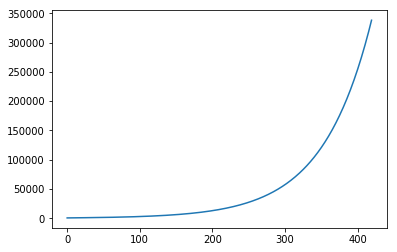

In [21]:
#Importer
from pylab import *   
                
#Tid og steg
ar = 35                                                                         
mnd = ar*12                                                                  
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                        #Befolkning ved start
fr = 0.015                                                                      #Fødselsraten
ir = 1.25                                                                       #Immigrasjons konstant som forteller 
                                                                                #hvor mange som immigrerer hver uke
#Matriser
P = zeros(N)                                                                    #
Pder = zeros(N)                                                                 #
T = zeros(N)                                                                    #Lager de nødvendige matrisene

#Initialverdier
P[0] = p0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:                                                               #Dette regner ut hvor mange som skal immigrere hver måned
        u = 15-(T[i]*ir)                                                        #Dette tallet minker etterhvert som tiden går
    Pder[i] = P[i]*fr+u                                                         #Bruker Eulers metode for og regne ut populasjons vekst
    P[i+1] = P[i]+Pder[i]*dt
    T[i+1] = T[i]+dt

plot(T, P)

Ettersom at de eneste faktorene vi må ta hensyn til i oppgaven 1 er nye mennesker ved fødsel og innvandringer dette en usannsynelig og begrenset modell. Dette gir en eksponentiell vekst av menneskepopulasjonen. fordi ulike faktorer som direkte eller indirekte synker populasjonen er ikke inkludert enda. 

## Oppgave 2.

I denne oppgaven så får vi en ny faktor, en bæreevne for populasjonen. Problemet med den forrige modellen var at eksponentiell vekst er sjeldent realistisk  over lange tidsperioder. Modellen kunne ha fungert hvis, for eksempel menneskepopulasjonen hadde ubegrenset ressurser, uten sykdom og liknende faktorer. 

Hvilke faktorer påvirker denne? 
Ressurser Alexandria har tilgjengelig som vann, mat og plass. Siden det ikke øker med økende bestand. 

Vi har gitt Alexandria en litt optimistisk bæreevne på 2500 mennesker. Metoden vi bruker er det samme, men med en utvidelse. 
(t -(H(t)/b)). Fn formel for bæreevne.

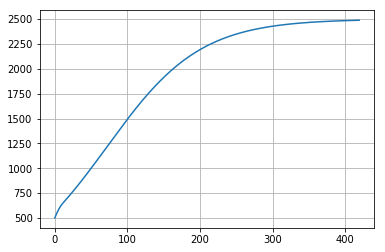

In [22]:
#Importer
from pylab import *

#Tid og steg
ar = 35
mnd = ar*12
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                        #Befolkning ved start
fr = 0.015                                                                      #Fødselsraten
ir = 1.25                                                                       #Immigrasjons konstant som forteller 
                                                                                #hvor mange som immigrerer hver uke
B = 2500                                                                        #Bæreevnen, altså hvor mange mennesker som kan bo der

#Matriser
P = zeros(N)
Pder = zeros(N)
T = zeros(N)

#Initialverdier
P[0] = p0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:
        u = 15-(T[i]*ir)
    Pder[i] = (fr*P[i]+u)*(1-P[i]/B)                                            #Eulers metode, men lagt til formelen for bæreevnen
    P[i+1] = P[i]+Pder[i]*dt
    T[i+1] = T[i]+dt

plot(T, P)
grid()

Her ser vi at vi får en utvikling som når den øvre grensen ved bæreevnen.

## Oppgave 3

For denne oppgaven kan menneskene også dø av sykdom, skade og alderdom. 

Endringene fra forrige oppgave er 

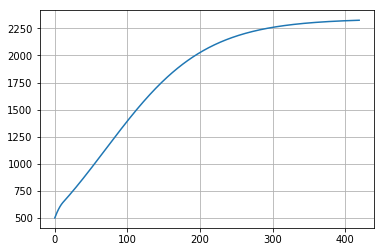

In [23]:
#Importer
from pylab import *

#Tid og steg
ar = 35
mnd = ar*12
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                          #Befolkning ved start
fr = 0.015                                                                        #Fødselsraten
dr = 0.001                                                                        #Dødsraten
ir = 1.25                                                                         #Immigrasjons konstant som forteller 
                                                                                  #hvor mange som immigrerer hver uke
B = 2500                                                                          #Bæreevnen, altså hvor mange mennesker som kan bo der

#Matriser
P = zeros(N)
Pder = zeros(N)
T = zeros(N)

#Initialverdier
P[0] = p0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:
        u = 15-(T[i]*ir)
    Pder[i] = (fr*P[i]+u)*(1-P[i]/B)-P[i]*dr                                     #Eulers metode, men trekker fra antall mennesker som dør
    P[i+1] = P[i]+Pder[i]*dt
    T[i+1] = T[i]+dt

plot(T, P)
grid()

Grafen ser veldig likt ut som i oppgave 3, men vi ser at den ikke når maksimum ved bæreevnen helt. Som følge av naturlig død.

## Oppgave 4

Dessverre for Alexandria skal vi nå legge inn en zombiepopulasjon i modellen vår. Populasjonen i Alexandria vil synke kraftig i denne modellen nå som vi har en zombiepopulasjon. 
For hvor sannsynlig det er at mennesker blir til drept av en zombie har vi valgt at det er en rate på 0.00001 for hvor ofte zombiene dreper menneskene

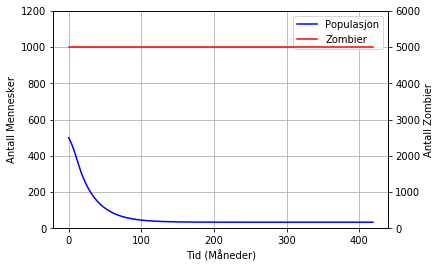

In [24]:
#Importer
from pylab import *

#Tid og steg
ar = 35
mnd = ar*12
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                          #Befolkning ved start
fr = 0.015                                                                        #Fødselsraten
dr = 0.001                                                                        #Dødsraten
ir = 1.25                                                                         #Immigrasjons konstant som forteller 
                                                                                  #hvor mange som immigrerer hver uke
B = 2500                                                                          #Bæreevnen, altså hvor mange mennesker som kan bo der

z0 = 5000                                                                         #Antall Zombier ved start
mr = 0.00001                                                                      #Mennesker som dør av Zombier- rate

#Matriser
P = zeros(N)
Pder = zeros(N)
Z = zeros(N)
T = zeros(N)

#Initialverdier
P[0] = p0
Z[0] = z0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:
        u = 15-(T[i]*ir)
    g = mr*Z[i]*P[i]                                                               #Hvor mange mennesker som blir drept av zombier
    Pder[i] = (fr*P[i]+u)*(1-P[i]/B)-P[i]*dr - g                                   #Samme som tidligere, men nå også med zombier som dreper mennesker
    Z[i+1] = Z[i]                                                                  #Siden Zombiepopulasjonen aldri øker, er den det samme uansett
    P[i+1] = P[i]+Pder[i]*dt
    T[i+1] = T[i]+dt

advPlot(T,P,Z) #Her bruker vi den avanserte plotte funksjonen fra tidligere

Ikke overraskende nok synker menneskepopulasjonen i Alexandria siden de ikke har evnen til å slå tilbake mot zombiene. Zombiepopulasjonen endrer seg ikke fordi de ikke har evnen til å reprodusere eller gjøre mennesker til zombier. Faktorer som bæreevne og naturlig død har nærmest ingen påvirkning på populasjonen i forhold til zombiene.

## Oppgave 5

Nå møter vi på situasjonen som dukker opp i en hver zombie-apokalypse situasjon, mennesker blir bitt av zombier og blir til zombier. For Alexandria sin skyld håper vi ingen blir bitt av en zombie, men så bestemmer seg for å ikke nevne det til noen før det er for sent. Som vi alle har sett i filmer og serier blir sluttresultatet ganske stygt. Men hvordan vil den nye faktoren på virke modellen vår?

Igjen så får vi nye rater. Zombiene i denne modellen er mindre morderiske enn man vanligvis ser på film og serier,
kun 10 prosent av mennesker som blir angrepet av zombier dør. Resten blir til zombier. 


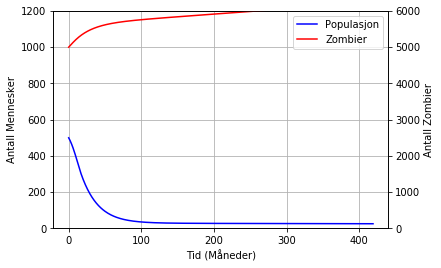

In [25]:
#Importer
from pylab import *

#Tid og steg
ar = 35
mnd = ar*12
U = ar*52
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                          #Befolkning ved start
fr = 0.015                                                                        #Fødselsraten
dr = 0.001                                                                        #Dødsraten
ir = 1.25                                                                         #Immigrasjons konstant som forteller 
                                                                                  #hvor mange som immigrerer hver uke
B = 2500                                                                          #Bæreevnen, altså hvor mange mennesker som kan bo der

z0 = 5000                                                                         #Antall Zombier ved start
mr = 0.00001                                                                      #Mennesker som dør av Zombier- rate
br = 0.9                                                                          #Raten for hvor mange mennesker som blir til zombier

#Matriser
P = zeros(N)
Pder = zeros(N)
Z = zeros(N)
Zder = zeros(N)
T = zeros(N)

#Initialverdier
P[0] = p0
Z[0] = z0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:
        u = 15-(T[i]*ir)
        
    g = mr*P[i]*Z[i]                                                              #Hvor mange mennesker som blir drept
    
    Pder[i] = (fr*P[i]+u)*(1-P[i]/B)-P[i]*dr - g                                  #Eulers metode som før
    Zder[i] = (br*g)                                                              #Her ganger vi antall mennesker som blir 
                                                                                  #drept med hvor mmange som blir til zombier
    P[i+1] = P[i]+Pder[i]*dt
    Z[i+1] = Z[i]+Zder[i]*dt
    T[i+1] = T[i]+dt

advPlot(T,P,Z)

Menneskepopulasjonen synker i likhet med den forrige modellen, men vi ser at zombipopulasjonen øker som følge av at mennesker kan bli til zombier. 

## Oppgave 6

Alexdria er overlykkelig, de har nå evnen til å slå tilbake mot zombiene. 

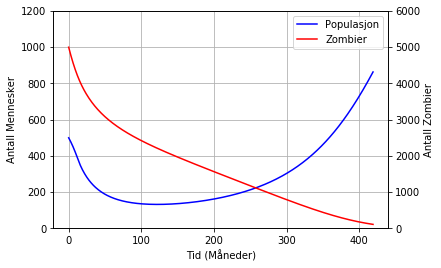

In [26]:
#Importer
from pylab import *

#Tid og steg
ar = 35
mnd = ar*12
U = ar*52
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                          #Befolkning ved start
fr = 0.015                                                                        #Fødselsraten
dr = 0.001                                                                        #Dødsraten
ir = 1.25                                                                         #Immigrasjons konstant som forteller 
                                                                                  #hvor mange som immigrerer hver uke
B = 2500                                                                          #Bæreevnen, altså hvor mange mennesker som kan bo der

z0 = 5000                                                                         #Antall Zombier ved start
mr = 0.00001                                                                      #Mennesker som dør av Zombier- rate
br = 0.9                                                                          #Raten for hvor mange mennesker som blir til zombier
kr = 0.00004                                                                      #Raten for hvor mange zombier som blir drept

#Matriser
P = zeros(N)
Pder = zeros(N)
Z = zeros(N)
Zder = zeros(N)
T = zeros(N)

#Initialverdier
P[0] = p0
Z[0] = z0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:
        u = 15-(T[i]*ir)
        
    g = mr*P[i]*Z[i]                                                              #Hvor mange mennesker som blir drept
    k = kr*P[i]*Z[i]                                                              #Hvor mange zombier som blir drept av mennesker
    
    Pder[i] = (fr*P[i]+u)*(1-P[i]/B)-P[i]*dr - g                                  #Eulers metode som før
    Zder[i] = (br*g)-k                                                            #Her ganger vi antall mennesker som blir 
                                                                                  #drept med hvor mange som blir til zombier
                                                                                  #og trekker fra antall som blir drept
    P[i+1] = P[i]+Pder[i]*dt
    Z[i+1] = Z[i]+Zder[i]*dt
    T[i+1] = T[i]+dt

advPlot(T,P,Z)

Vi ser at populasjonen i Alexdria begynner å øke etterhvert og antall zombier reduseres. Først når zombiepopulasjonen er lav nok, ser vi at menneskepopulasjonen øker. Siden menneskene kan endelig slå tilbake mot zombiene, er det færre som dør og blir om til zombier. Antall zombier som blir drept er større enn antall nye zombier som blir til. Det gjør at zombiepopulasjonen synker. 

## Oppgave 7
I denne oppgaven kommer det forsterkninger til Alexandria når det er behov for det. Disse forsterkningene blir da værende i Alexandria i 16 måneder før de drar hjem igjen.


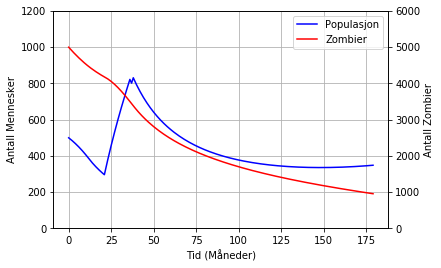

In [27]:
#Importer
from pylab import *

#Tid og steg
ar = 15
mnd = ar*12
U = ar*52
N = mnd
dt = mnd/N

#Konstanter
p0 = 500                                                                          #Befolkning ved start
fr = 0.015                                                                        #Fødselsraten
dr = 0.001                                                                        #Dødsraten
ir = 1.25                                                                         #Immigrasjons konstant som forteller 
                                                                                  #hvor mange som immigrerer hver uke
B = 2500                                                                          #Bæreevnen, altså hvor mange mennesker som kan bo der
R = 0                                                                             #Antall forsterkninger som kommer hver måned "by default"
x = 0                                                                             #Antall måneder forsterkningene blir "by default"


z0 = 5000                                                                         #Antall Zombier ved start
mr = 0.00001                                                                      #Mennesker som dør av Zombier- rate
br = 0.9                                                                          #Raten for hvor mange mennesker som blir til zombier
kr = 0.00003                                                                      #Raten for hvor mange zombier som blir drept

#Matriser
P = zeros(N)
Pder = zeros(N)
Z = zeros(N)
Zder = zeros(N)
T = zeros(N)

#Initialverdier
P[0] = p0
Z[0] = z0
T[0] = 0

#Eulers Metode
for i in range(N-1):
    if T[i] < 12:
        u = 15-(T[i]*ir)
        
    if P[i] < 300:                                                                #Sjekker om det er færre enn 300 mennesker igjen
        R = 50                                                                    #Det kommer 50 forsterkninger
        x = 16                                                                    #Antall måneder forsterkningene blir
        u = 1                                                                     #Sier at det er forsterkninger i Alexandria
    if x > 0:                                                                     #Sier at det har gått en måned
        x -= 1
    elif x == 0:                                                                  #Sjekker om forsterkningene skal dra eller ikke
        if u == 1:                                                                #Sjekker om det faktisk er forsterkninger i Alexandria
            P[i] = P[i]-50                                                        #Trekker da fra forsterkningene fra befolkningen
            u -= 1                                                                #Sier at det ikke er forsterkninger i Alexandria
        else:
            R = 0                                                                 #Sier at det ikke kommer noen forsterkninger
    
    g = mr*P[i]*Z[i]                                                              #Hvor mange mennesker som blir drept
    k = kr*P[i]*Z[i]                                                              #Hvor mange zombier som blir drept av mennesker
    
    Pder[i] = (fr*P[i]+u)*(1-P[i]/B)-P[i]*dr - g + R                              #Eulers metode som før + forsterkninger
    Zder[i] = (br*g)-k                                                            #Her ganger vi antall mennesker som blir 
                                                                                  #drept med hvor mmange som blir til zombier
                                                                                  #og trekker fra antall som blir drept
    P[i+1] = P[i]+Pder[i]*dt
    Z[i+1] = Z[i]+Zder[i]*dt
    T[i+1] = T[i]+dt

advPlot(T,P,Z)

Da kan vi se at når populasjonen synker under 300, skyter den plutselig til værs, da den får forsterkninger. Etter 16 måneder drar de igjen og populasjonen synker igjen

## Konklusjon

Populasjonsdynamikk påvirkes sterkt av ulike faktorer man velger å inkludere i modellen sin. Konstanter som brukes i modellen må tilpasses og justeres slik at modellen passer økosystemet. I tillegg må man endre på og utvikle programmet ved nye faktorer som introduseres. Ved å bruke modellen kan vi si noe om hvordan populasjonen vil utvikle seg videre og samtidig gi oss en forståelse for hvordan ulike populasjoner påvirker hverandre.